In [84]:
%matplotlib inline

import pickle
from transformers import AutoTokenizer, AutoModelForCausalLM

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from IPython.display import clear_output
from collections import Counter
os.chdir("../")

from src import utils
from src.opt_tok import optimal_tokenization
from matplotlib.lines import Line2D


In [14]:
data = []
for i in range(1):
    with open(f'/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/shortest_vs_factual_modelMinistral-8B-Instruct-2410_p1.0_kNone_numseq10_numprompts30_maxoutlen200_temp2.0_id{1+i}.pkl', 'rb') as file:
        data=data+pickle.load(file)



In [24]:
print(len(data[1]["output"][5]))

231


In [83]:
#Load tokenizer if need
tokenizer = AutoTokenizer.from_pretrained("mistralai/Ministral-8B-Instruct-2410")
print(tokenizer.decode(data[10]["output"][9][-10:]))

 Industrial periods like your question suggested. These new concepts


In [ ]:
print(data[20]["prompt"])
print(len([i.item() for i in data[20]["output"][0]]))
#print(tokenizer.decode(data[11]["output"][0]))
print(data[20]["optimal_lengths"][0])
#print(optimal_tokenization(tokenizer.decode(data[11]["output"][0]), tokenizer)["ids"])

In [ ]:

ratios = []
for i in range(len(data)):
    for seq in range(len(data[i]["output"])):

        if len(data[i]["output"][seq])>0:


            ratios.append(data[i]["optimal_lengths"][seq] / len(data[i]["output"][seq]))            


#Remove outliers, normally due to non-standar characters
ratios = [(1-ratio)*100 for ratio in ratios if 1>=ratio>=0.95]
with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/ratios_8B.pkl', 'wb') as file:
    pickle.dump(ratios, file)

In [3]:


with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/ratios_1B.pkl', 'rb') as file:
    ratios_L1B = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/ratios_3B.pkl', 'rb') as file:
    ratios_L3B = pickle.load(file)

with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/ratios_1B.pkl', 'rb') as file:
    ratios_G1B = pickle.load(file)
    
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/ratios_4B.pkl', 'rb') as file:
    ratios_G4B = pickle.load(file)
    
with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/ratios_8B.pkl', 'rb') as file:
    ratios_M8B = pickle.load(file)


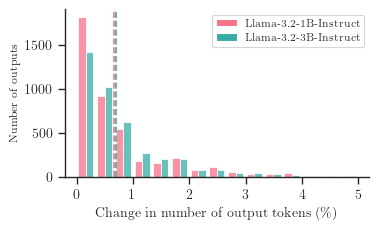

In [215]:
from matplotlib.patches import Patch

sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 2)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



df = pd.DataFrame({
    'ratios': ratios_L1B + ratios_L3B ,
    'model': ['1B'] * len(ratios_L1B) + ['3B'] * len(ratios_L3B) 
})

fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


sns.histplot(data = df, x="ratios",hue="model", palette=palette, ax=ax, bins=15, legend=False, kde=False, multiple="dodge", shrink=0.8)  # Histogram with KDE

#sns.rugplot(data = df, x="ratios",hue="model", palette=[palette[1], palette[2], palette[0]], alpha=0.5, legend=True)  # Rug plot for individual observations


# Define custom legend elements
legend_elements = [
    Patch(facecolor=palette[0], edgecolor="white", label="Llama-3.2-1B-Instruct"),  # Color and label for 1B
    Patch(facecolor=palette[1], edgecolor="white", label="Llama-3.2-3B-Instruct"),  # Color and label for 3B
    #Patch(facecolor=palette[0], edgecolor="white", label="3.1-8B-Instruct")  # Color and label for 8B
]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)

ax.axvline(np.mean(ratios_L1B), color=palette[0], linestyle="--")
ax.axvline(np.mean(ratios_L3B), color=palette[1], linestyle="--")

#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Change in number of output tokens ($\%$)")
ax.set_ylabel("Number of outputs", fontsize=8)
#ax.set_xticks([ 0,1,2,3,4,5], [r"0\%",r"1\%",r"2\%",r"3\%",r"4\%",r"5\%"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/hist_dp_L.pdf', dpi=300)


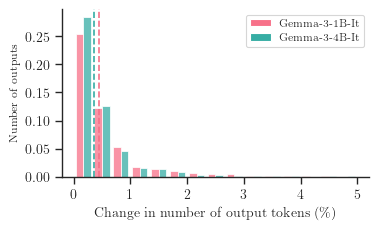

In [217]:
from matplotlib.patches import Patch

sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 2)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



df = pd.DataFrame({
    'ratios': ratios_G1B + ratios_G4B ,
    'model': ['1B'] * len(ratios_G1B) + ['4B'] * len(ratios_G4B) 
})

fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


sns.histplot(data = df, x="ratios",hue="model", palette=palette, ax=ax, bins=15, legend=False, kde=False, stat="probability", multiple="dodge", shrink=0.8 )  # Histogram with KDE

#sns.rugplot(data = df, x="ratios",hue="model", palette=[palette[1], palette[2], palette[0]], alpha=0.5, legend=True)  # Rug plot for individual observations


# Define custom legend elements
legend_elements = [
    Patch(facecolor=palette[0], edgecolor="white", label="Gemma-3-1B-It"),  # Color and label for 1B
    Patch(facecolor=palette[1], edgecolor="white", label="Gemma-3-4B-It"),  # Color and label for 3B
    #Patch(facecolor=palette[0], edgecolor="white", label="3.1-8B-Instruct")  # Color and label for 8B
]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)

ax.axvline(np.mean(ratios_G1B), color=palette[0], linestyle="--")
ax.axvline(np.mean(ratios_G4B), color=palette[1], linestyle="--")


#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Change in number of output tokens ($\%$)")
ax.set_ylabel("Number of outputs", fontsize=8)
#ax.set_xticks([ 0,1,2,3,4,5], [r"0\%",r"1\%",r"2\%",r"3\%",r"4\%",r"5\%"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/hist_dp_G.pdf', dpi=300)


/tmp/ipykernel_818077/1876176369.py:21: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.histplot(data = df, x="ratios",hue="model", palette=[palette[1],palette[0]], ax=ax, bins=15, legend=False, kde=False, stat="probability", multiple="dodge", shrink=0.8)  # Histogram with KDE


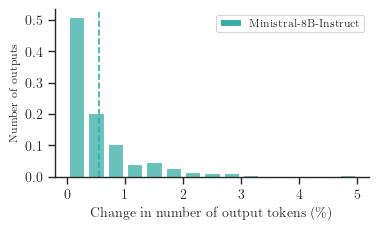

In [7]:
from matplotlib.patches import Patch

sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 2)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



df = pd.DataFrame({
    'ratios': ratios_M8B ,
    'model': ['8B'] * len(ratios_M8B) 
})

fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


sns.histplot(data = df, x="ratios",hue="model", palette=[palette[1],palette[0]], ax=ax, bins=15, legend=False, kde=False, stat="probability", multiple="dodge", shrink=0.8)  # Histogram with KDE

#sns.rugplot(data = df, x="ratios",hue="model", palette=[palette[1], palette[2], palette[0]], alpha=0.5, legend=True)  # Rug plot for individual observations


# Define custom legend elements
legend_elements = [
    Patch(facecolor=palette[1], edgecolor="white", label="Ministral-8B-Instruct"),  # Color and label for 1B
    #Patch(facecolor=palette[2], edgecolor="white", label="Gemma-3-4B-It"),  # Color and label for 3B
    #Patch(facecolor=palette[0], edgecolor="white", label="3.1-8B-Instruct")  # Color and label for 8B
]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)

#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Change in number of output tokens ($\%$)")
ax.set_ylabel("Number of outputs", fontsize=8)
#ax.set_xticks([ 0,1,2,3,4,5], [r"0\%",r"1\%",r"2\%",r"3\%",r"4\%",r"5\%"])
ax.axvline(np.mean(ratios_M8B), color=palette[1], linestyle="--")

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/hist_dp_M.pdf', dpi=300)


# Plots with cost/price using percentages


In [9]:
data = []
for i in range(18):
    with open(f'/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/shortest_vs_factual_modelLlama-3.2-3B-Instruct_p1.0_kNone_numseq10_numprompts30_maxoutlen200_temp2.0_id{1+i}.pkl', 'rb') as file:
        data=data+pickle.load(file)

In [49]:
num_tok_fact_G1B = 0
num_tok_opt_G1B = 0
num_char_G1B = 0
tokenizer = AutoTokenizer.from_pretrained("google/gemma-3-1b-it") 
for i in range(len(data)):
    for seq in range(len(data[i]["output"])):

        if ( len(data[i]["output"][seq])>0 )and (0.5< data[i]["optimal_lengths"][seq] / len(data[i]["output"][seq]) < 1):
            num_tok_fact_G1B += len(data[i]["output"][seq])
            num_tok_opt_G1B += data[i]["optimal_lengths"][seq]
            num_char_G1B += len(tokenizer.decode(data[i]["output"][seq]))
            
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/num_char_G1B.pkl', 'wb') as file:
     pickle.dump(num_char_G1B,file)

with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/num_tok_fact_G1B.pkl', 'wb') as file:
    pickle.dump(num_tok_fact_G1B,file)
    
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/num_tok_opt_G1B.pkl', 'wb') as file:
    pickle.dump(num_tok_opt_G1B,file)

    


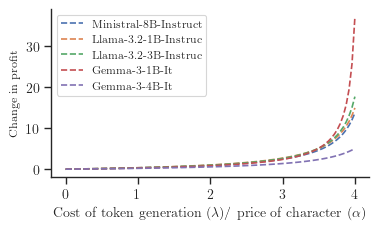

In [ ]:
with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/num_char_M8B.pkl', 'rb') as file:
     num_char_M8B = pickle.load(file)

with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/tok_opt_M8B.pkl', 'rb') as file:
     num_tok_opt_M8B = pickle.load(file)
    
with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/tok_fac_M8B.pkl', 'rb') as file:
     num_tok_fact_M8B = pickle.load(file)
     
     
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/num_char_G4B.pkl', 'rb') as file:
        num_char_G4B = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/tok_opt_G4B.pkl', 'rb') as file:
        num_tok_opt_G4B = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/tok_fac_G4B.pkl', 'rb') as file:    
        num_tok_fact_G4B = pickle.load(file)
        
        
    
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/num_char_G1B.pkl', 'rb') as file:
        num_char_G1B = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/tok_opt_G1B.pkl', 'rb') as file:
        num_tok_opt_G1B = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/tok_fac_G1B.pkl', 'rb') as file:
        num_tok_fact_G1B = pickle.load(file)
        
        
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/num_char_L1B.pkl', 'rb') as file:
        num_char_L1B = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/tok_opt_L1B.pkl', 'rb') as file:
        num_tok_opt_L1B = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/tok_fac_L1B.pkl', 'rb') as file:
        num_tok_fact_L1B = pickle.load(file)
        
        
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/num_char_L3B.pkl', 'rb') as file:
        num_char_L3B = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/tok_opt_L3B.pkl', 'rb') as file:
        num_tok_opt_L3B = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/tok_fac_L3B.pkl', 'rb') as file:
        num_tok_fact_L3B = pickle.load(file)



from matplotlib.patches import Patch
import numpy as np
sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 5)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX

x = np.linspace(0, 4, 100)
increase_M8B = ( (num_char_M8B - x * num_tok_opt_M8B) / (num_char_M8B - x * num_tok_fact_M8B) - 1)*100
increase_L3B = ( (num_char_L3B - x * num_tok_opt_L3B) / (num_char_L3B - x * num_tok_fact_L3B) - 1)*100
increase_L1B = ( (num_char_L1B - x * num_tok_opt_L1B) / (num_char_L1B - x * num_tok_fact_L1B) - 1)*100
increase_G1B = ( (num_char_G1B - x * num_tok_opt_G1B) / (num_char_G1B - x * num_tok_fact_G1B) - 1)*100
increase_G4B = ( (num_char_G4B - x * num_tok_opt_G4B) / (num_char_G4B - x * num_tok_fact_G4B) - 1)*100


df = pd.DataFrame({
    'y': np.concatenate((increase_M8B,increase_L1B,increase_L3B,increase_G1B,increase_G4B)),
    'x': np.concatenate((x,x,x,x,x)),
    'model' : ['M8B']*len(increase_M8B) + ['L1B']*len(increase_L1B) + ['L3B']*len(increase_L3B) + ['G1B']*len(increase_G1B) + ['G4B']*len(increase_G4B)
})

fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


sns.lineplot(data = df, x="x",y="y",color=palette, hue="model" ,ax=ax, legend=True, linestyle="--", errorbar=None)  

ax.get_legend().set_title(None)
ax.legend(labels=["Ministral-8B-Instruct", "Llama-3.2-1B-Instruc", "Llama-3.2-3B-Instruc","Gemma-3-1B-It","Gemma-3-4B-It"], fontsize=8)  # Update the labels

sns.despine(ax=ax)
ax.set_xlabel(r"Cost of token generation ($\lambda$)/ price of character ($\alpha$)")
ax.set_ylabel("Change in profit", fontsize="small")
#ax.set_yticks([ 0,1,2,3,4,5], [r"0\%",r"1\%",r"2\%",r"3\%",r"4\%",r"5\%"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/profit_dp_mult_costs.pdf', dpi=300)


In [51]:
print(num_tok_opt_M8B)
print((num_tok_fact_L3B-num_tok_opt_L3B)/num_tok_opt_L3B *100)

print(num_char_M8B)
print(num_char_G4B)
print(num_char_G1B)
print(num_char_L1B)
print(num_char_L3B)

446999
1.0990680472670475
1949506
2313684
2305010
2469615
2712488


# Plots distribution of profit for different c/p using percentages

In [56]:
data = []
for i in range(18):
    with open(f'/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/shortest_vs_factual_modelLlama-3.2-3B-Instruct_p1.0_kNone_numseq10_numprompts30_maxoutlen200_temp2.0_id{i+1}.pkl', 'rb') as file:
        data=data+pickle.load(file)


In [57]:
characters, tokens, optimal_tokens = [], [], []
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-3B-Instruct")
for i in range(len(data)):
    for seq in range(len(data[i]["output"])):

        if len(data[i]["output"][seq])>0:
            characters.append(len(tokenizer.decode(data[i]["output"][seq])))
            tokens.append(len(data[i]["output"][seq]))
            optimal_tokens.append(data[i]["optimal_lengths"][seq])


with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/characters_L3B.pkl', 'wb') as file:
     pickle.dump(characters,file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/tokens_L3B.pkl', 'wb') as file:
     pickle.dump(tokens,file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/optimal_tokens_L3B.pkl', 'wb') as file: 
     pickle.dump(optimal_tokens,file)

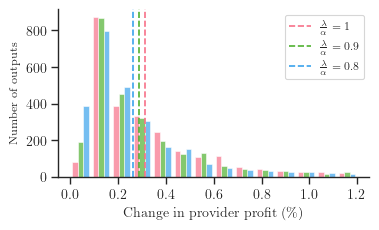

In [220]:
from matplotlib.patches import Patch
import numpy as np


with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/characters_L3B.pkl', 'rb') as file:
     characters = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/tokens_L3B.pkl', 'rb') as file:
     tokens = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/optimal_tokens_L3B.pkl', 'rb') as file:
     optimal_tokens = pickle.load(file)



sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



y_cp1 = [ ((characters[i] - 1 * optimal_tokens[i]) / (characters[i] - 1 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp09 = [ ((characters[i] - 0.9 * optimal_tokens[i]) / (characters[i] - 0.9 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp08 = [ ((characters[i] - 0.8 * optimal_tokens[i]) / (characters[i] - 0.8 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp1 = [i for i in y_cp1 if i<1.25]
y_cp09 = [i for i in y_cp09 if i<1.25]
y_cp08 = [i for i in y_cp08 if i<1.25]



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


df = pd.DataFrame({
    'profits':  y_cp1 + y_cp09 + y_cp08,
    'cp' : ['cp1']*len(y_cp1) + ['cp09']*len(y_cp09) + ['cp08']*len(y_cp08)
})

hist = sns.histplot(data = df, x="profits", hue="cp", palette=palette ,ax=ax, legend=True, multiple = "dodge", kde=False, bins=np.linspace(0,1.2,15), shrink=0.8, alpha=0.7)  # Histogram with KDE

#sns.kdeplot(data = df, x="profits", hue="cp", palette=palette ,ax=ax, legend=True, clip=(0,1.25))
# Add a vertical line for the mean
ax.axvline(np.mean(y_cp1), color=palette[0], linestyle="--")
ax.axvline(np.mean(y_cp09), color=palette[1], linestyle="--")
ax.axvline(np.mean(y_cp08), color=palette[2], linestyle="--")


ax.legend(labels=[r"$\frac{\lambda}{\alpha}=1$", r"$\frac{\lambda}{\alpha}=0.9$", r"$\frac{\lambda}{\alpha}=0.8$"], fontsize=8)  # Update the labels

sns.despine(ax=ax)
#ax.set_xlabel(r"Cost of token genreation / price of character ")
ax.set_xlabel(r"Change in provider profit ($\%$)")
ax.set_ylabel("Number of outputs", fontsize="small")

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/profit_dp_mult_costs_dist_L3B.pdf', dpi=300)


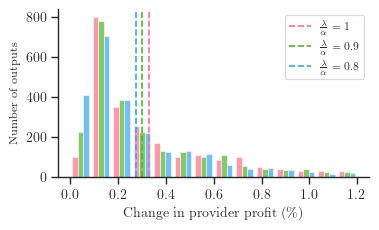

In [221]:
from matplotlib.patches import Patch
import numpy as np


with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/characters_L1B.pkl', 'rb') as file:
     characters = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/tokens_L1B.pkl', 'rb') as file:
     tokens = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/optimal_tokens_L1B.pkl', 'rb') as file:
     optimal_tokens = pickle.load(file)



sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



y_cp1 = [ ((characters[i] - 1 * optimal_tokens[i]) / (characters[i] - 1 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp09 = [ ((characters[i] - 0.9 * optimal_tokens[i]) / (characters[i] - 0.9 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp08 = [ ((characters[i] - 0.8 * optimal_tokens[i]) / (characters[i] - 0.8 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp1 = [i for i in y_cp1 if i<1.25]
y_cp09 = [i for i in y_cp09 if i<1.25]
y_cp08 = [i for i in y_cp08 if i<1.25]



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


df = pd.DataFrame({
    'profits':  y_cp1 + y_cp09 + y_cp08,
    'cp' : ['cp1']*len(y_cp1) + ['cp09']*len(y_cp09) + ['cp08']*len(y_cp08)
})

hist = sns.histplot(data = df, x="profits", hue="cp", palette=palette ,ax=ax, legend=True, multiple ="dodge", kde=False, bins=np.linspace(0,1.2,15), shrink=0.8, alpha=0.7)  # Histogram with KDE

#sns.kdeplot(data = df, x="profits", hue="cp", palette=palette ,ax=ax, legend=True, clip=(0,1.25))

ax.axvline(np.mean(y_cp1), color=palette[0], linestyle="--")
ax.axvline(np.mean(y_cp09), color=palette[1], linestyle="--")
ax.axvline(np.mean(y_cp08), color=palette[2], linestyle="--")
ax.legend(labels=[r"$\frac{\lambda}{\alpha}=1$", r"$\frac{\lambda}{\alpha}=0.9$", r"$\frac{\lambda}{\alpha}=0.8$"], fontsize=8)  # Update the labels

sns.despine(ax=ax)
#ax.set_xlabel(r"Cost of token genreation / price of character ")
ax.set_xlabel(r"Change in provider profit ($\%$)")
ax.set_ylabel("Number of outputs", fontsize="small")
#ax.set_yticks([ 0,1,2,3,4,5], [r"0\%",r"1\%",r"2\%",r"3\%",r"4\%",r"5\%"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/profit_dp_mult_costs_dist_L1B.pdf', dpi=300)


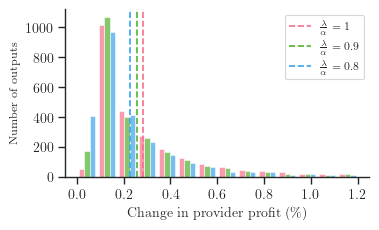

In [222]:
from matplotlib.patches import Patch
import numpy as np


with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/characters_G1B.pkl', 'rb') as file:
     characters = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/tokens_G1B.pkl', 'rb') as file:
     tokens = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/optimal_tokens_G1B.pkl', 'rb') as file:
     optimal_tokens = pickle.load(file)



sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



y_cp1 = [ ((characters[i] - 1 * optimal_tokens[i]) / (characters[i] - 1 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp09 = [ ((characters[i] - 0.9 * optimal_tokens[i]) / (characters[i] - 0.9 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp08 = [ ((characters[i] - 0.8 * optimal_tokens[i]) / (characters[i] - 0.8 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp1 = [i for i in y_cp1 if i<1.25]
y_cp09 = [i for i in y_cp09 if i<1.25]
y_cp08 = [i for i in y_cp08 if i<1.25]



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


df = pd.DataFrame({
    'profits':  y_cp1 + y_cp09 + y_cp08,
    'cp' : ['cp1']*len(y_cp1) + ['cp09']*len(y_cp09) + ['cp08']*len(y_cp08)
})

hist = sns.histplot(data = df, x="profits", hue="cp", palette=palette ,ax=ax, legend=True, multiple ="dodge", kde=False, bins=np.linspace(0,1.2,15), shrink=0.8, alpha=0.7)  # Histogram with KDE

#sns.kdeplot(data = df, x="profits", hue="cp", palette=palette ,ax=ax, legend=True, clip=(0,1.25))

ax.axvline(np.mean(y_cp1), color=palette[0], linestyle="--")
ax.axvline(np.mean(y_cp09), color=palette[1], linestyle="--")
ax.axvline(np.mean(y_cp08), color=palette[2], linestyle="--")
ax.legend(labels=[r"$\frac{\lambda}{\alpha}=1$", r"$\frac{\lambda}{\alpha}=0.9$", r"$\frac{\lambda}{\alpha}=0.8$"], fontsize=8)  # Update the labels

sns.despine(ax=ax)
#ax.set_xlabel(r"Cost of token genreation / price of character ")
ax.set_xlabel(r"Change in provider profit ($\%$)")
ax.set_ylabel("Number of outputs", fontsize="small")
#ax.set_yticks([ 0,1,2,3,4,5], [r"0\%",r"1\%",r"2\%",r"3\%",r"4\%",r"5\%"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/profit_dp_mult_costs_dist_G1B.pdf', dpi=300)


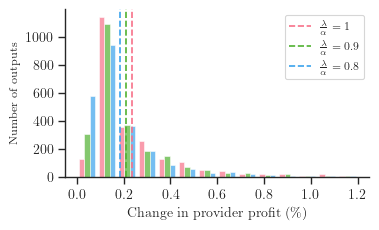

In [223]:
from matplotlib.patches import Patch
import numpy as np


with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/characters_G4B.pkl', 'rb') as file:
     characters = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/tokens_G4B.pkl', 'rb') as file:
     tokens = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/optimal_tokens_G4B.pkl', 'rb') as file:
     optimal_tokens = pickle.load(file)



sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



y_cp1 = [ ((characters[i] - 1 * optimal_tokens[i]) / (characters[i] - 1 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp09 = [ ((characters[i] - 0.9 * optimal_tokens[i]) / (characters[i] - 0.9 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp08 = [ ((characters[i] - 0.8 * optimal_tokens[i]) / (characters[i] - 0.8 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp1 = [i for i in y_cp1 if i<1.25]
y_cp09 = [i for i in y_cp09 if i<1.25]
y_cp08 = [i for i in y_cp08 if i<1.25]



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


df = pd.DataFrame({
    'profits':  y_cp1 + y_cp09 + y_cp08,
    'cp' : ['cp1']*len(y_cp1) + ['cp09']*len(y_cp09) + ['cp08']*len(y_cp08)
})

hist = sns.histplot(data = df, x="profits", hue="cp", palette=palette ,ax=ax, legend=True, multiple ="dodge", kde=False, bins=np.linspace(0,1.2,15), shrink=0.8, alpha=0.7)  # Histogram with KDE

#sns.kdeplot(data = df, x="profits", hue="cp", palette=palette ,ax=ax, legend=True, clip=(0,1.25))
ax.axvline(np.mean(y_cp1), color=palette[0], linestyle="--")
ax.axvline(np.mean(y_cp09), color=palette[1], linestyle="--")
ax.axvline(np.mean(y_cp08), color=palette[2], linestyle="--")

ax.legend(labels=[r"$\frac{\lambda}{\alpha}=1$", r"$\frac{\lambda}{\alpha}=0.9$", r"$\frac{\lambda}{\alpha}=0.8$"], fontsize=8)  # Update the labels

sns.despine(ax=ax)
#ax.set_xlabel(r"Cost of token genreation / price of character ")
ax.set_xlabel(r"Change in provider profit ($\%$)")
ax.set_ylabel("Number of outputs", fontsize="small")
#ax.set_yticks([ 0,1,2,3,4,5], [r"0\%",r"1\%",r"2\%",r"3\%",r"4\%",r"5\%"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/profit_dp_mult_costs_dist_G4B.pdf', dpi=300)


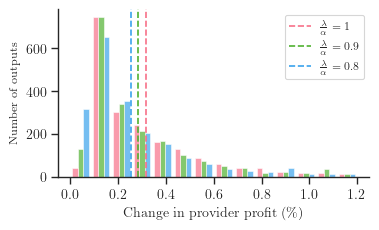

In [224]:
from matplotlib.patches import Patch
import numpy as np


with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/characters_M8B.pkl', 'rb') as file:
     characters = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/tokens_M8B.pkl', 'rb') as file:
     tokens = pickle.load(file)
with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/optimal_tokens_M8B.pkl', 'rb') as file:
     optimal_tokens = pickle.load(file)



sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



y_cp1 = [ ((characters[i] - 1 * optimal_tokens[i]) / (characters[i] - 1 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp09 = [ ((characters[i] - 0.9 * optimal_tokens[i]) / (characters[i] - 0.9 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp08 = [ ((characters[i] - 0.8 * optimal_tokens[i]) / (characters[i] - 0.8 * tokens[i] ) -1 )*100 for i in range(len(characters)) if (optimal_tokens[i]/tokens[i] > 0.95) and (optimal_tokens[i]/tokens[i] < 1) and (characters[i]>optimal_tokens[i])]

y_cp1 = [i for i in y_cp1 if i<1.25]
y_cp09 = [i for i in y_cp09 if i<1.25]
y_cp08 = [i for i in y_cp08 if i<1.25]



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


df = pd.DataFrame({
    'profits':  y_cp1 + y_cp09 + y_cp08,
    'cp' : ['cp1']*len(y_cp1) + ['cp09']*len(y_cp09) + ['cp08']*len(y_cp08)
})

hist = sns.histplot(data = df, x="profits", hue="cp", palette=palette ,ax=ax, legend=True, multiple ="dodge", kde=False, bins=np.linspace(0,1.2,15), shrink=0.8, alpha=0.7)  # Histogram with KDE

#sns.kdeplot(data = df, x="profits", hue="cp", palette=palette ,ax=ax, legend=True, clip=(0,1.25))

ax.axvline(np.mean(y_cp1), color=palette[0], linestyle="--")
ax.axvline(np.mean(y_cp09), color=palette[1], linestyle="--")
ax.axvline(np.mean(y_cp08), color=palette[2], linestyle="--")
ax.legend(labels=[r"$\frac{\lambda}{\alpha}=1$", r"$\frac{\lambda}{\alpha}=0.9$", r"$\frac{\lambda}{\alpha}=0.8$"], fontsize=8)  # Update the labels

sns.despine(ax=ax)
#ax.set_xlabel(r"Cost of token genreation / price of character ")
ax.set_xlabel(r"Change in provider profit ($\%$)")
ax.set_ylabel("Number of outputs", fontsize="small")
#ax.set_yticks([ 0,1,2,3,4,5], [r"0\%",r"1\%",r"2\%",r"3\%",r"4\%",r"5\%"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/profit_dp_mult_costs_dist_m8B.pdf', dpi=300)


# Plots dp using absulute differences


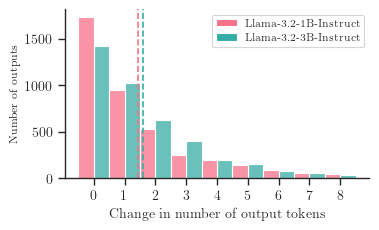

In [170]:
with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/optimal_tokens_L1B.pkl', 'rb') as file:
    L1B_opt = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/tokens_L1B.pkl', 'rb') as file:
    L1B_fact = pickle.load(file)

with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/optimal_tokens_L3B.pkl', 'rb') as file:
    L3B_opt = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/tokens_L3B.pkl', 'rb') as file:
    L3B_fact = pickle.load(file)


L1B_dif = [L1B_fact[i]-L1B_opt[i] for i in range(len(L1B_fact)) if 10>L1B_fact[i]-L1B_opt[i]>=0]
L3B_dif = [L3B_fact[i]-L3B_opt[i] for i in range(len(L3B_fact)) if 10>L3B_fact[i]-L3B_opt[i]>=0]

L1B_dif = L1B_dif[0:min(len(L1B_dif),len(L3B_dif))]
L3B_dif = L3B_dif[0:min(len(L1B_dif),len(L3B_dif))]


from matplotlib.patches import Patch

sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 2)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



df = pd.DataFrame({
    'ratios': L1B_dif + L3B_dif ,
    'model': ['1B'] * len(L1B_dif) + ['3B'] * len(L3B_dif) 
})




fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


sns.histplot(data = df, x="ratios",hue="model", palette=palette, ax=ax, bins=np.arange(-0.5, 9, 1.0), legend=False, kde=False, multiple="dodge")  # Histogram with KDE

#sns.rugplot(data = df, x="ratios",hue="model", palette=[palette[1], palette[2], palette[0]], alpha=0.5, legend=True)  # Rug plot for individual observations


# Define custom legend elements
legend_elements = [
    Patch(facecolor=palette[0], edgecolor="white", label="Llama-3.2-1B-Instruct"),  # Color and label for 1B
    Patch(facecolor=palette[1], edgecolor="white", label="Llama-3.2-3B-Instruct"),  # Color and label for 3B
    #Patch(facecolor=palette[0], edgecolor="white", label="3.1-8B-Instruct")  # Color and label for 8B
]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)

ax.axvline(np.mean(L1B_dif), color=palette[0], linestyle="--")
ax.axvline(np.mean(L3B_dif), color=palette[1], linestyle="--")

#ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Change in number of output tokens")
ax.set_ylabel("Number of outputs", fontsize=8)
ax.set_xticks([ 0,1,2,3,4,5,6,7,8], [r"0",r"1",r"2",r"3",r"4",r"5","6",r"7",r"8"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/hist_dp_L_absolute.pdf', dpi=300)


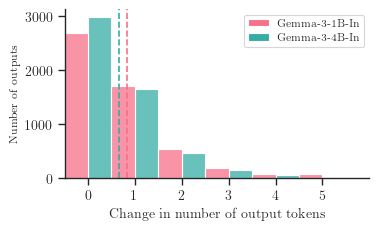

[0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 3, 0, 1, 1, 1, 3, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 3, 3, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 4, 4, 2, 0, 1, 0, 1, 0, 0, 1, 0, 3, 2, 0, 2, 3, 5, 0, 3, 0, 0, 0, 1, 1, 0, 2, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 5, 4, 4, 3, 3, 2, 0, 0, 1, 0, 3, 0, 2, 1, 0, 0, 1, 2, 1, 3, 0, 1, 0, 0, 0, 2, 1, 0, 3, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 4, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 3, 2, 1, 0, 2, 2, 1, 0, 0, 3, 2, 0, 0, 2, 0, 4, 0, 0, 1, 0, 0, 0, 3, 

In [169]:
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/optimal_tokens_G1B.pkl', 'rb') as file:
    G1B_opt = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/tokens_G1B.pkl', 'rb') as file:
    G1B_fact = pickle.load(file)

with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/optimal_tokens_G4B.pkl', 'rb') as file:
    G4B_opt = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/tokens_G4B.pkl', 'rb') as file:
    G4B_fact = pickle.load(file)


G1B_dif = [G1B_fact[i]-G1B_opt[i] for i in range(len(G1B_fact)) if 10>G1B_fact[i]-G1B_opt[i]>=0]
G4B_dif = [G4B_fact[i]-G4B_opt[i] for i in range(len(G4B_fact)) if 10>G4B_fact[i]-G4B_opt[i]>=0]

G1B_dif = G1B_dif[0:min(len(G1B_dif),len(G4B_dif))]
G4B_dif = G4B_dif[0:min(len(G1B_dif),len(G4B_dif))]



from matplotlib.patches import Patch

sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 2)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



df = pd.DataFrame({
    'ratios': G1B_dif + G4B_dif ,
    'model': ['1B'] * len(G1B_dif) + ['3B'] * len(G4B_dif) 
})



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


sns.histplot(data = df, x="ratios",hue="model", palette=palette, ax=ax, bins=np.arange(-0.5, 9, 1.0), legend=False, kde=False, multiple="dodge")  # Histogram with KDE

#sns.rugplot(data = df, x="ratios",hue="model", palette=[palette[1], palette[2], palette[0]], alpha=0.5, legend=True)  # Rug plot for individual observations


# Define custom legend elements
legend_elements = [
    Patch(facecolor=palette[0], edgecolor="white", label="Gemma-3-1B-In"),  # Color and label for 1B
    Patch(facecolor=palette[1], edgecolor="white", label="Gemma-3-4B-In"),  # Color and label for 3B
    #Patch(facecolor=palette[0], edgecolor="white", label="3.1-8B-Instruct")  # Color and label for 8B
]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)

ax.axvline(np.mean(G1B_dif), color=palette[0], linestyle="--")
ax.axvline(np.mean(G4B_dif), color=palette[1], linestyle="--")

#ax.set_yscale("log")
ax.set_xlim([-0.5,6])
sns.despine(ax=ax)
ax.set_xlabel(r"Change in number of output tokens")
ax.set_ylabel("Number of outputs", fontsize=8)
ax.set_xticks([ 0,1,2,3,4,5], [r"0",r"1",r"2",r"3",r"4",r"5"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/hist_dp_G_absolute.pdf', dpi=300)
print(G4B_dif)

/tmp/ipykernel_818077/3127033270.py:38: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.histplot(data = df, x="ratios",hue="model", palette=[palette[1],palette[0]], ax=ax, bins=np.arange(-0.5, 9, 1.0), legend=False, kde=False, multiple="dodge")  # Histogram with KDE


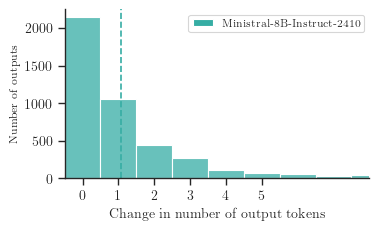

In [168]:
with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/optimal_tokens_M8B.pkl', 'rb') as file:
    M8B_opt = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/tokens_M8B.pkl', 'rb') as file:
    M8B_fact = pickle.load(file)




M8B_dif = [M8B_fact[i]-M8B_opt[i] for i in range(len(M8B_fact)) if 10>M8B_fact[i]-M8B_opt[i]>=0]




from matplotlib.patches import Patch

sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 2)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX



df = pd.DataFrame({
    'ratios': M8B_dif ,
    'model': ['1B'] * len(M8B_dif) 
})



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


sns.histplot(data = df, x="ratios",hue="model", palette=[palette[1],palette[0]], ax=ax, bins=np.arange(-0.5, 9, 1.0), legend=False, kde=False, multiple="dodge")  # Histogram with KDE

#sns.rugplot(data = df, x="ratios",hue="model", palette=[palette[1], palette[2], palette[0]], alpha=0.5, legend=True)  # Rug plot for individual observations


# Define custom legend elements
legend_elements = [
    Patch(facecolor=palette[1], edgecolor="white", label="Ministral-8B-Instruct-2410"),  # Color and label for 1B
    #Patch(facecolor=palette[1], edgecolor="white", label="Gemma-3-4B-In"),  # Color and label for 3B
    #Patch(facecolor=palette[0], edgecolor="white", label="3.1-8B-Instruct")  # Color and label for 8B
]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right', fontsize="7.5", frameon=True)

ax.axvline(np.mean(M8B_dif), color=palette[1], linestyle="--")

#ax.set_yscale("log")
ax.set_xlim([-0.5,8])
sns.despine(ax=ax)
ax.set_xlabel(r"Change in number of output tokens")
ax.set_ylabel("Number of outputs", fontsize=8)
ax.set_xticks([ 0,1,2,3,4,5], [r"0",r"1",r"2",r"3",r"4",r"5"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/hist_dp_M_absolute.pdf', dpi=300)


# Plots c/p absolute diff

4011


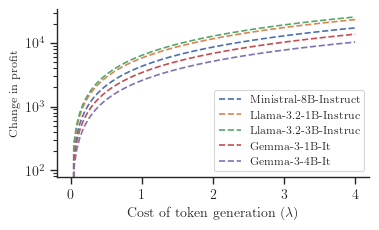

In [208]:
with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/optimal_tokens_G1B.pkl', 'rb') as file:
    G1B_opt = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-1B/tokens_G1B.pkl', 'rb') as file:
    G1B_fact = pickle.load(file)

with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/optimal_tokens_G4B.pkl', 'rb') as file:
    G4B_opt = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/gemma-3-4B/tokens_G4B.pkl', 'rb') as file:
    G4B_fact = pickle.load(file)
    
    
    
with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/optimal_tokens_M8B.pkl', 'rb') as file:
    M8B_opt = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/mistral-8B/tokens_M8B.pkl', 'rb') as file:
    M8B_fact = pickle.load(file)



with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/optimal_tokens_L1B.pkl', 'rb') as file:
    L1B_opt = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-1B-Instruct/tokens_L1B.pkl', 'rb') as file:
    L1B_fact = pickle.load(file)

with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/optimal_tokens_L3B.pkl', 'rb') as file:
    L3B_opt = pickle.load(file)
    

with open('/NL/token-pricing/work/outputs/dp_profit_increase/llama3.2-3B-Instruct/tokens_L3B.pkl', 'rb') as file:
    L3B_fact = pickle.load(file)





G1B_dif = [G1B_fact[i]-G1B_opt[i] for i in range(len(G1B_fact)) if 10>G1B_fact[i]-G1B_opt[i]>=0]
G4B_dif = [G4B_fact[i]-G4B_opt[i] for i in range(len(G4B_fact)) if 10>G4B_fact[i]-G4B_opt[i]>=0]
L1B_dif = [L1B_fact[i]-L1B_opt[i] for i in range(len(L1B_fact)) if 10>L1B_fact[i]-L1B_opt[i]>=0]
L3B_dif = [L3B_fact[i]-L3B_opt[i] for i in range(len(L3B_fact)) if 10>L3B_fact[i]-L3B_opt[i]>=0]
M8B_dif = [M8B_fact[i]-M8B_opt[i] for i in range(len(M8B_fact)) if 10>M8B_fact[i]-M8B_opt[i]>=0]

min_len = min(len(L1B_dif),len(L3B_dif),len(G1B_dif),len(G4B_dif),len(M8B_dif))
print(min_len)
L1B_dif = np.sum(L1B_dif[0:min_len])
L3B_dif = np.sum(L3B_dif[0:min_len])
G1B_dif = np.sum(G1B_dif[0:min_len])
G4B_dif = np.sum(G4B_dif[0:min_len])
M8B_dif = np.sum(M8B_dif[0:min_len])

from matplotlib.patches import Patch
import numpy as np
sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 5)

utils.latexify() # Computer Modern, with TeX
# utils.latexify(font_serif='Times New Roman', font_size=10, usetex=False) # Times New Roman, without TeX

x = np.linspace(0, 4, 100)
increase_M8B =  M8B_dif*x
increase_L1B =  L1B_dif*x
increase_L3B =  L3B_dif*x
increase_G1B =  G1B_dif*x
increase_G4B =  G4B_dif*x




df = pd.DataFrame({
    'y': np.concatenate((increase_M8B,increase_L1B,increase_L3B,increase_G1B,increase_G4B)),
    'x': np.concatenate((x,x,x,x,x)),
    'model' : ['M8B']*len(increase_M8B) + ['L1B']*len(increase_L1B) + ['L3B']*len(increase_L3B) + ['G1B']*len(increase_G1B) + ['G4B']*len(increase_G4B)
})

fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


sns.lineplot(data = df, x="x",y="y",color=palette, hue="model" ,ax=ax, legend=True, linestyle="--", errorbar=None)  

ax.get_legend().set_title(None)
ax.legend(labels=["Ministral-8B-Instruct", "Llama-3.2-1B-Instruc", "Llama-3.2-3B-Instruc","Gemma-3-1B-It","Gemma-3-4B-It"], fontsize=8)  # Update the labels

ax.set_yscale("log")
sns.despine(ax=ax)
ax.set_xlabel(r"Cost of token generation ($\lambda$)")
ax.set_ylabel("Change in profit", fontsize="small")
#ax.set_yticks([ 0,1,2,3,4,5], [r"0\%",r"1\%",r"2\%",r"3\%",r"4\%",r"5\%"])

fig.tight_layout()
plt.show()
fig.savefig('/NL/token-pricing/work/figures/dp/profit_dp_mult_costs_abs.pdf', dpi=300)
